<a href="https://colab.research.google.com/github/Lungs-X-Ray-Neural-Network/Predictive-Analysis-for-the-Detection-of-Covid-19-with-Chest-X-Ray-Images-Using-Convolutional-Neural/blob/main/COVID_19_Prediction_with_Chest_X_Ray_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os , shutil

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content


In [ ]:
!unzip '/content/drive/My Drive/Kaggle data/Covid/Copy of covid_data.zip'

Archive:  /content/drive/My Drive/Kaggle data/Covid/Copy of covid_data.zip
  inflating: val/corona/1.jpeg       
  inflating: val/corona/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg  
  inflating: val/corona/ryct.2020200034.fig5-day7.jpeg  
  inflating: val/normal/IM-0154-0001.jpeg  
  inflating: val/normal/IM-0141-0001.jpeg  
  inflating: val/normal/IM-0140-0001.jpeg  
  inflating: val/normal/IM-0156-0001.jpeg  
  inflating: val/normal/IM-0149-0001.jpeg  
  inflating: val/corona/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg  
  inflating: val/normal/IM-0151-0001.jpeg  
  inflating: val/corona/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg  
  inflating: val/normal/IM-0147-0001.jpeg  
  inflating: val/normal/IM-0145-0001.jpeg  
  inflating: test/normal/IM-0115-0001.jpeg  
  inflating: val/normal/IM-0152-0001.jpeg  
  inflating: test/corona/SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day12.jpeg  
  inflating: val/corona/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jp

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
source = '/content/drive/My Drive/Kaggle data/Covid/Copy of covid_data.zip'
print(os.path.exists(source))

True


Prepare the Data

In [ ]:
train = 'train'

In [ ]:
val = 'val'
test = 'test'

In [ ]:
gen = ImageDataGenerator(rescale=1./255, rotation_range=40, 
                         width_shift_range= 0.2,
                         height_shift_range= 0.2,
                         zoom_range = 0.2, 
                         shear_range= 0.2,
                         fill_mode = 'nearest')
                        

In [ ]:
train_gen = gen.flow_from_directory(train , target_size= (200,200) , class_mode='binary' , batch_size=20  )

Found 244 images belonging to 2 classes.


In [ ]:
val_gen = gen.flow_from_directory(val , target_size=(200,200) , class_mode="binary" , batch_size=20)

Found 20 images belonging to 2 classes.


In [ ]:
#Making MOdel 
model1 = models.Sequential()

In [ ]:
counter =0
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[counter])
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
1
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
2
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
3
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
4
4


In [ ]:
data_batch[0]
labels_batch[0]

1.0

Making a Model 

In [ ]:

model = model1


In [ ]:
model.add(layers.Conv2D(32,(3,3), activation='relu' , input_shape = (200,200,3)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


ValueError: ignored

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 98, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)       

Compile Model 

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4) ,
              loss="binary_crossentropy" , 
              metrics= ['acc'])

In [ ]:
history = model.fit(train_gen,steps_per_epoch=70,epochs=10, validation_data=val_gen, validation_steps=30)

Epoch 1/10
70/70 [==============================] - 71s 1s/step - loss: 0.2720 - acc: 0.9220 - val_loss: 5.3348 - val_acc: 0.5000
Epoch 2/10
70/70 [==============================] - 62s 884ms/step - loss: 0.2143 - acc: 0.9425 - val_loss: 10.3963 - val_acc: 0.5000
Epoch 3/10
 9/70 [==>...........................] - ETA: 28s - loss: 0.1187 - acc: 0.9573

KeyboardInterrupt: ignored

Prepare test Data

In [ ]:
test_gen = gen.flow_from_directory(test , target_size=(200,200) , class_mode='binary' , batch_size= 20)
                                   

Found 20 images belonging to 2 classes.


In [ ]:
counter =0
for data_b, labels_b in test_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[counter])
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
1
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
2
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
3
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
4
4


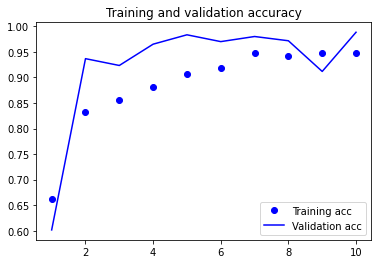

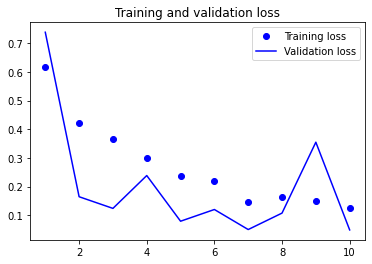

In [ ]:
%matplotlib inline  
import matplotlib.pyplot as plt
history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Test a single Image of Corona and non corona x-ray 

In [ ]:
d = 'test/normal/IM-0131-0001.jpeg' # non corona image
f = "test/corona/SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg"  # corona image

In [ ]:
t = image.load_img(d ,target_size=(200,200))
t= image.img_to_array(t)
t = np.expand_dims(t , axis=0)
t/= 255.

tf = image.load_img(f ,target_size=(200,200))
tf= image.img_to_array(tf)
tf = np.expand_dims(tf , axis=0)
tf/= 255.

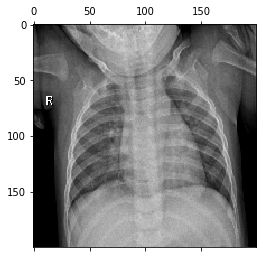

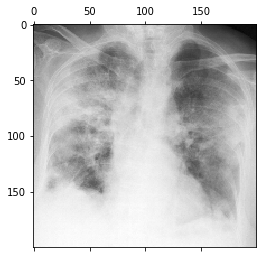

In [ ]:
plt.matshow(t[0]) # non corona image
plt.matshow(tf[0]) # corona image

In [ ]:
b = model.predict(t[[0]])
a = model.predict(tf[[0]])

In [ ]:
if a<.50:
  print("corona")


corona


In [ ]:
if b>.50 :
  print('good health')

good health


Making a list as per prediction on test data

In [ ]:
# TEST the MOdel
predict = model.predict(test_gen)
predict = list(predict)

In [ ]:
prediction =[]


In [ ]:
for i in predict:
  if i>.50:
    prediction.append("Healthy")
  else:
    prediction.append('CORONA VIRUS')

In [ ]:
prediction,predict

(['CORONA VIRUS',
  'CORONA VIRUS',
  'Healthy',
  'Healthy',
  'CORONA VIRUS',
  'Healthy',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'Healthy',
  'Healthy',
  'Healthy',
  'CORONA VIRUS',
  'Healthy',
  'CORONA VIRUS',
  'Healthy',
  'Healthy',
  'Healthy',
  'Healthy',
  'CORONA VIRUS',
  'CORONA VIRUS'],
 [array([0.14510259], dtype=float32),
  array([0.03893353], dtype=float32),
  array([0.99974793], dtype=float32),
  array([0.9933201], dtype=float32),
  array([0.17653644], dtype=float32),
  array([0.5333707], dtype=float32),
  array([0.03224381], dtype=float32),
  array([0.03890773], dtype=float32),
  array([0.9995079], dtype=float32),
  array([0.98610616], dtype=float32),
  array([0.992281], dtype=float32),
  array([0.01342097], dtype=float32),
  array([0.9970626], dtype=float32),
  array([0.00319352], dtype=float32),
  array([0.998075], dtype=float32),
  array([0.9610265], dtype=float32),
  array([0.9991534], dtype=float32),
  array([0.99985945], dtype=float32),
  array([0.1482183],

In [ ]:
model.evaluate(test_gen)

1/1 [==============================] - 1s 708ms/step


[0.12496744096279144, 1.0]

In [ ]:
import pickle

In [ ]:
with open('covidmodel.pickle', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
!ls

covidmodel.pickle  drive  sample_data  test  train  val


In [ ]:
!dir

covidmodel.pickle  drive  sample_data  test  train  val


In [ ]:
!pwd

/content


In [ ]:
!unzip '/content/drive/My Drive/Kaggle data/Covid/CT Covid Adrian.zip'

Archive:  /content/drive/My Drive/Kaggle data/Covid/CT Covid Adrian.zip
   creating: CT Covid Adrian/CT_COVID/
  inflating: CT Covid Adrian/CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png  
  inflating: CT Covid Adrian/CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%1.png  
  inflating: CT Covid Adrian/CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-91.png  
  inflating: CT Covid Adrian/CT_COVID/2020.01.24.919183-p27-132.png  
  inflating: CT Covid Adrian/CT_COVID/2020.01.24.919183-p27-133.png  
  inflating: CT Covid Adrian/CT_COVID/2020.01.24.919183-p27-134.png  
  inflating: CT Covid Adrian/CT_COVID/2020.01.24.919183-p27-135.png  
  inflating: CT Covid Adrian/CT_COVID/2020.02.10.20021584-p6-52%0.png  
  inflating: CT Covid Adrian/CT_COVID/2020.02.10.20021584-p6-52%1.png  
  inflating: CT Covid Adrian/CT_COVID/2020.02.10.20021584-p6-52%10.png  
  infla

In [ ]:
!ls

 covidmodel.pickle  'CT Covid Adrian'   drive   sample_data


In [ ]:
!unzip '/content/testadrian.zip'

Archive:  /content/testadrian.zip
   creating: test/covid/
  inflating: test/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: test/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: test/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: test/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: test/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: test/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: test/covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: test/covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: test/covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: test/covid/lancet-case2a.jpg  
  inflating: test/covid/lancet-case2b.jpg  
  inflating: test/covid/nCoV-radiol.2020200269.fig1-day7.jpeg  
  inflating: test/covid/nejmc2001573_f1a.jpeg  
  inflating: test/covid/nejmc2

In [ ]:
test='test'

In [ ]:
import pickle

In [ ]:
with open('covidmodel.pickle','rb') as f:
  load_model=pickle.load(f)

In [ ]:
test_data_gen=ImageDataGenerator(rescale=1/255.)
test_gen=test_data_gen.flow_from_directory(test,target_size=(200,200),class_mode='binary',batch_size=20)

Found 50 images belonging to 2 classes.


In [ ]:
load_model.evaluate(test_gen)

3/3 [==============================] - 1s 399ms/step


[0.4946973919868469, 0.9800000190734863]

In [ ]:
predict=load_model.predict(test_gen)
predict=list(predict)

In [ ]:
prediction=[]
for i in predict:
  if i>.50:
    prediction.append("Healthy")
  else:
    prediction.append('CORONA VIRUS')

In [ ]:
for i in range(50):
  print(prediction[i],'\t',predict[i])

Healthy 	 [0.9973738]
Healthy 	 [0.99595803]
CORONA VIRUS 	 [0.00892567]
Healthy 	 [0.9999546]
Healthy 	 [0.9914396]
CORONA VIRUS 	 [0.02218789]
Healthy 	 [0.99844664]
Healthy 	 [0.86689943]
Healthy 	 [0.9686997]
Healthy 	 [0.76691484]
CORONA VIRUS 	 [0.05828446]
CORONA VIRUS 	 [0.0078519]
CORONA VIRUS 	 [0.00965434]
CORONA VIRUS 	 [0.045879]
Healthy 	 [0.99380386]
CORONA VIRUS 	 [0.01862895]
CORONA VIRUS 	 [0.02136905]
Healthy 	 [0.9999722]
Healthy 	 [0.9988661]
CORONA VIRUS 	 [0.0113857]
Healthy 	 [0.99874854]
Healthy 	 [0.99972457]
CORONA VIRUS 	 [0.03549166]
CORONA VIRUS 	 [0.03839918]
Healthy 	 [0.9590953]
CORONA VIRUS 	 [0.00421406]
CORONA VIRUS 	 [0.01101325]
CORONA VIRUS 	 [0.01772252]
Healthy 	 [0.9540083]
Healthy 	 [0.9592738]
CORONA VIRUS 	 [0.11100677]
CORONA VIRUS 	 [0.00737809]
CORONA VIRUS 	 [0.04431432]
CORONA VIRUS 	 [0.0294141]
CORONA VIRUS 	 [0.08513646]
CORONA VIRUS 	 [0.05003079]
Healthy 	 [0.9518921]
CORONA VIRUS 	 [0.01743243]
Healthy 	 [0.9996877]
Healthy 	 [0.9

In [ ]:
type(prediction)

list